In [1]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv('6.3.8.csv', sep=";")
data

,Vek,Náklady
0,1,250
1,1,275
2,2,325
3,2,300
4,3,400
5,4,425
6,4,450
7,5,425
8,5,525
9,6,600


In [2]:
X = data['Vek']
y = data['Náklady']
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Náklady   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     89.19
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.30e-05
Time:                        18:42:58   Log-Likelihood:                -48.369
No. Observations:                  10   AIC:                             100.7
Df Residuals:                       8   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.9751     23.815      8.271      0.000     142.058     251.892
Vek           60.7651      6.434      9.444      0.000      45.928      75.602
==============================================================================
Omnibus:                        8.065   Durbin-Watson:                   2.404
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                3.230
Skew:                          -1.266   Prob(JB):                        0.199
Kurtosis:                       4.156   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
from statsmodels.stats.outliers_influence import summary_table

st, data, st2 = summary_table(model, alpha=0.05)

In [4]:
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,250.0,257.7402135231316,18.311631607520187,215.5135153169823,299.9669117292809,168.47157726402997,347.00884978223326,-7.740213523131615,28.773953076149876,-0.26900070013484917,0.01465317877629041
2.0,275.0,257.7402135231316,18.31163160752018,215.5135153169823,299.9669117292809,168.47157726402997,347.00884978223326,17.259786476868385,28.77395307614988,0.5998406416800149,0.07286128107074608
3.0,325.0,318.5053380782918,13.648684351116293,287.03141552685236,349.97926062973124,233.79168404931846,403.21899210726514,6.4946619217082,31.25651361303113,0.20778587151832933,0.004116257580759373
4.0,300.0,318.5053380782918,13.648684351116293,287.03141552685236,349.97926062973124,233.79168404931846,403.21899210726514,-18.5053380782918,31.25651361303113,-0.5920474147371558,0.033418233810090535
5.0,400.0,379.270462633452,10.956794899336614,354.0040482888692,404.53687697803474,296.6618246347613,461.8791006321427,20.729537366548016,32.298682222218886,0.6418075271283905,0.023701567766827636
6.0,425.0,440.0355871886122,11.688034992191731,413.08293016620337,466.9882442110211,356.89569845441804,523.1754759228064,-15.035587188612226,32.041318103026114,-0.46925620039308563,0.014650495147263588
7.0,450.0,440.0355871886122,11.688034992191731,413.08293016620337,466.9882442110211,356.89569845441804,523.1754759228064,9.964412811387774,32.041318103026114,0.3109863576569496,0.0064345019826780115
8.0,425.0,500.8007117437724,15.361087430716465,465.3779806099311,536.2234428776137,414.5420005364573,587.0594229510875,-75.80071174377241,30.451489630293818,-2.489228364984949,0.7883631643383967
9.0,525.0,500.8007117437724,15.361087430716465,465.3779806099311,536.2234428776137,414.5420005364573,587.0594229510875,24.19928825622759,30.451489630293818,0.7946832338919013,0.08034982635501507


In [8]:
st[1]

In [7]:
data[1]

array([2.00000000e+00, 2.75000000e+02, 2.57740214e+02, 1.83116316e+01,
       2.15513515e+02, 2.99966912e+02, 1.68471577e+02, 3.47008850e+02,
       1.72597865e+01, 2.87739531e+01, 5.99840642e-01, 7.28612811e-02])

In [10]:
st2

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

In [35]:
import numpy as np
import matplotlib.pyplot as plt

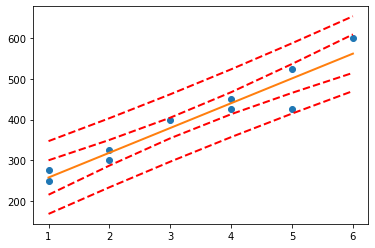

In [37]:
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

# Check we got the right things
#print np.max(np.abs(re.fittedvalues - fittedvalues))
#print np.max(np.abs(iv_l - predict_ci_low))
#print np.max(np.abs(iv_u - predict_ci_upp))

plt.plot(X, y, 'o')
plt.plot(X, fittedvalues, '-', lw=2)
plt.plot(X, predict_ci_low, 'r--', lw=2)
plt.plot(X, predict_ci_upp, 'r--', lw=2)
plt.plot(X, predict_mean_ci_low, 'r--', lw=2)
plt.plot(X, predict_mean_ci_upp, 'r--', lw=2)
plt.show()

In [38]:
fittedvalues

array([257.74021352, 257.74021352, 318.50533808, 318.50533808,
       379.27046263, 440.03558719, 440.03558719, 500.80071174,
       500.80071174, 561.5658363 ])